#Introduction

#Data

##Imports

This section is simply used to import the libraries necessary to determine the model of the problem. As well as importing the dataset that Bob has provided us with.

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from pandas import DataFrame
from IPython.display import HTML

In [3]:
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [0]:
bank_data=pd.read_csv('/content/Drive/My Drive/bank-additional-full.csv',sep=";",low_memory=False)

##Exploratory Data Analysis

###Information about the data

Now that the data has been imported into the notebook, we will now be performing exploratory data analysis on it.

In [5]:
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
bank_data.shape

(41188, 21)

In [7]:
print('Null values in dataset are',len(bank_data[bank_data.isnull().any(1)]))

Null values in dataset are 0


In [8]:
bank_data.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [9]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
data_dup = bank_data[bank_data.duplicated(keep="last")]
data_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [11]:
bank_data = bank_data.drop_duplicates()
bank_data.shape

(41176, 21)

In [12]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


###Univariate Analysis

####Output y

In [13]:
bank_data["y"].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

In [14]:
bank_data['y'].value_counts(normalize=True)

no     0.887337
yes    0.112663
Name: y, dtype: float64

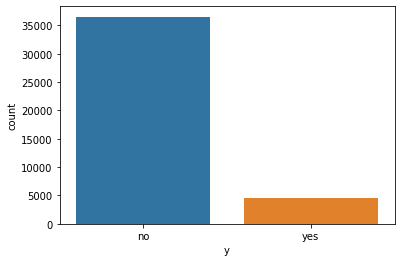

In [15]:
sb.countplot(x='y',data=bank_data)
plt.show()

#### Functions

In [0]:
def bar_graph(column):
  plt.figure(figsize=(12,8))
  ax=sb.countplot(bank_data[column], data=bank_data)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  for p in ax.patches:
    x=(p.get_height()/len(bank_data[column]))*100
    ax.annotate((round(x,2)), (p.get_x(), p.get_height()))
  plt.xlabel(column)
  plt.ylabel('Fequency of subscribers or non subscribers')
  return

In [0]:
def compare_bar_graph(column):
  plt.figure(figsize=(12,8))
  ax=sb.countplot(x=column, data=bank_data, hue="y")
  for p in ax.patches:
    x=(p.get_height()/len(bank_data[column]))*100
    ax.annotate(round(x,2), (p.get_x(), p.get_height()))

  plt.show()
  return

In [0]:
def continous_graph(column):
  fig, axs = plt.subplots(1,2,figsize=(12,8))
  sb.boxplot(data=bank_data, x='y',y=column,ax=axs[0])
  sb.distplot(bank_data.loc[bank_data['y']=='yes',column],bins=10, label='yes', ax=axs[1])
  sb.distplot(bank_data.loc[bank_data['y']=='no',column],bins=10, label='no',ax=axs[1])
  return

#### Job

In [19]:
bank_data["job"].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

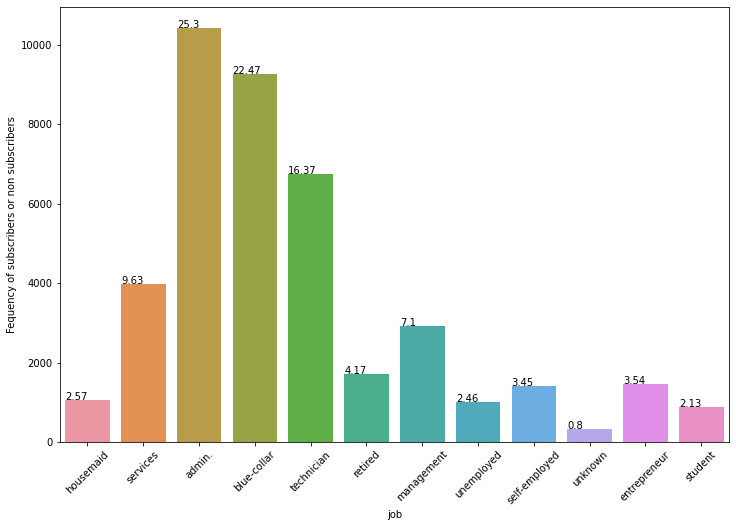

In [20]:
bar_graph('job')

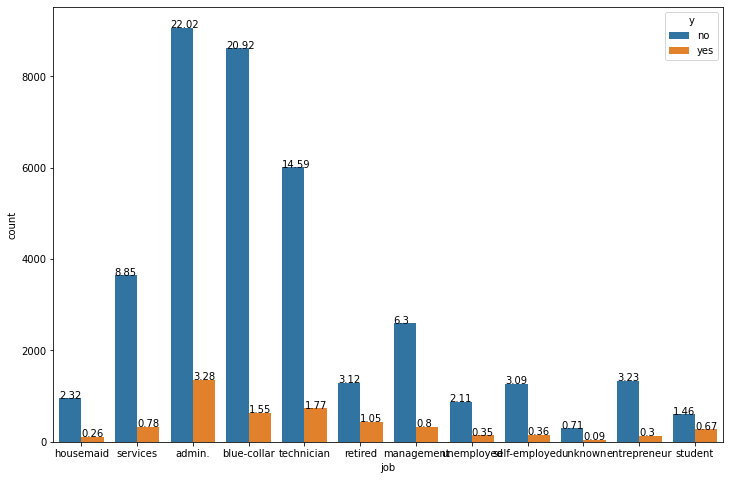

In [21]:
compare_bar_graph('job')

####Marital

In [22]:
bank_data["marital"].value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

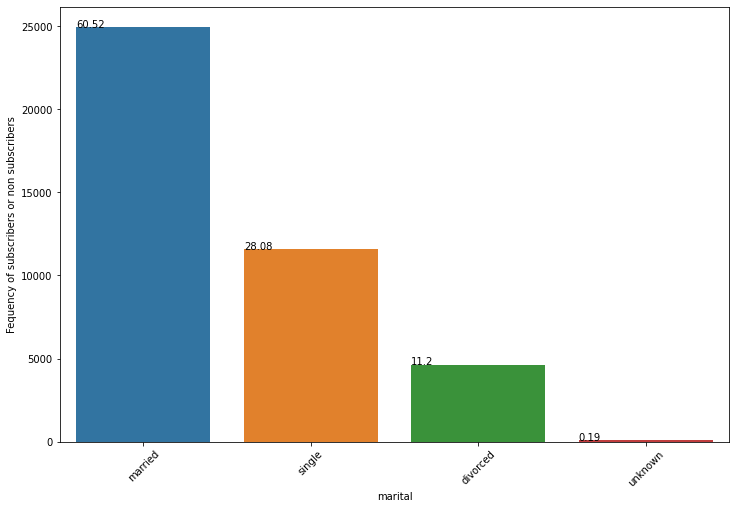

In [23]:
bar_graph('marital')

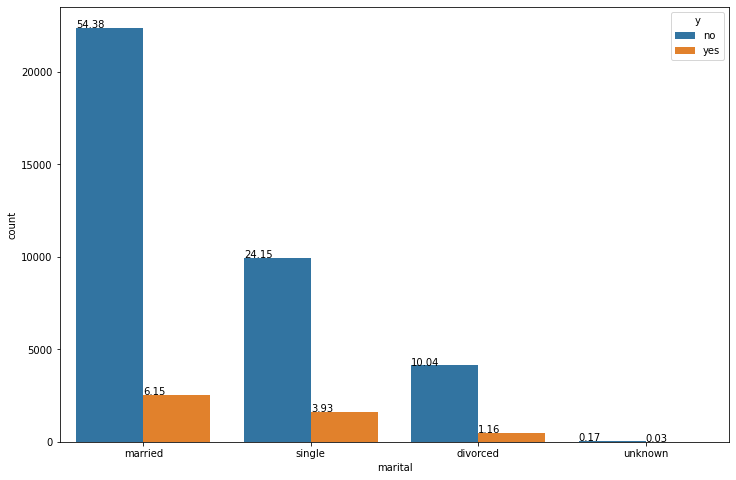

In [24]:
compare_bar_graph('marital')

####Education

In [25]:
bank_data["education"].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

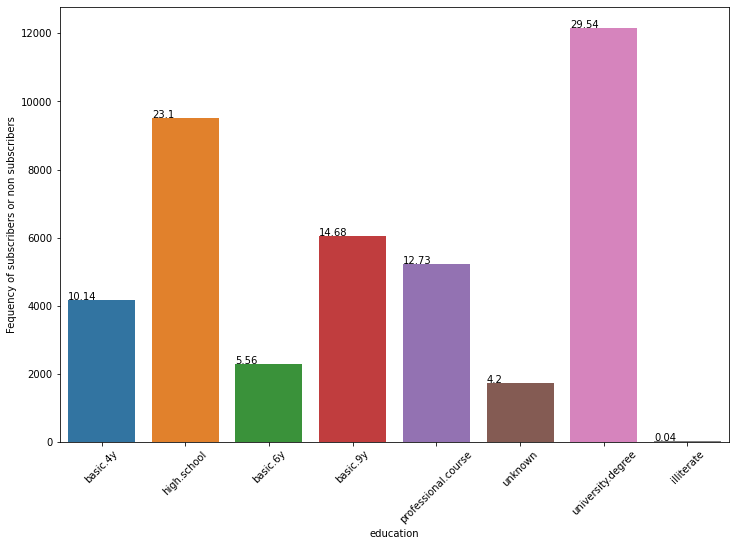

In [26]:
bar_graph('education')

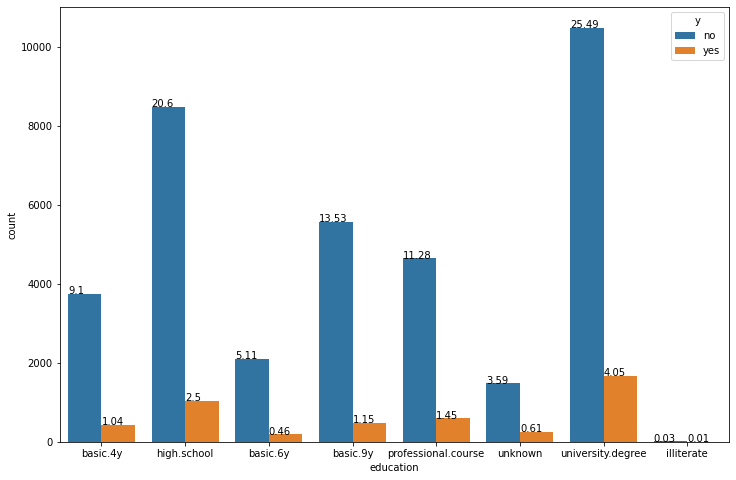

In [27]:
compare_bar_graph('education')

####Housing

In [28]:
bank_data["housing"].value_counts()

yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

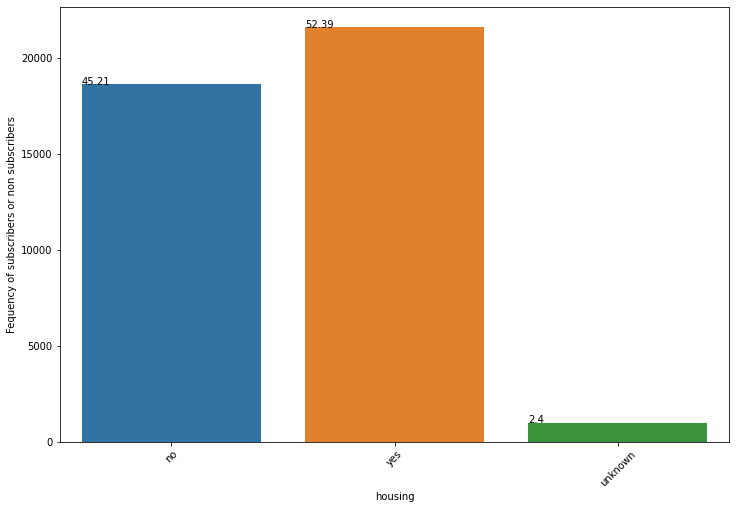

In [29]:
bar_graph('housing')

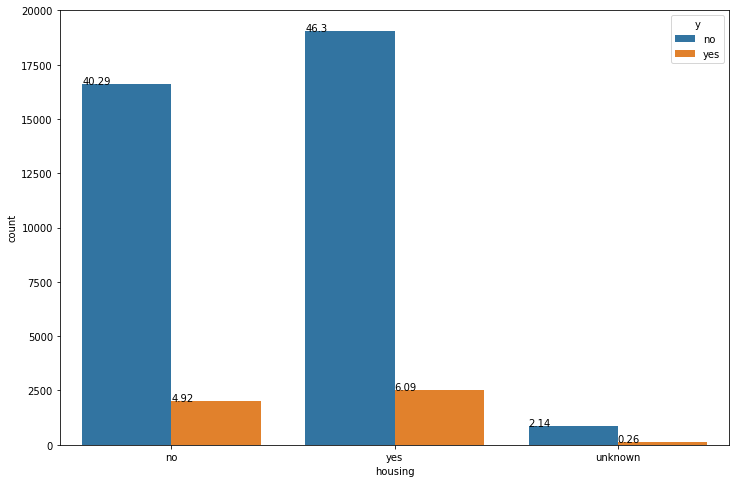

In [30]:
compare_bar_graph('housing')

####Loan

In [31]:
bank_data["loan"].value_counts()

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

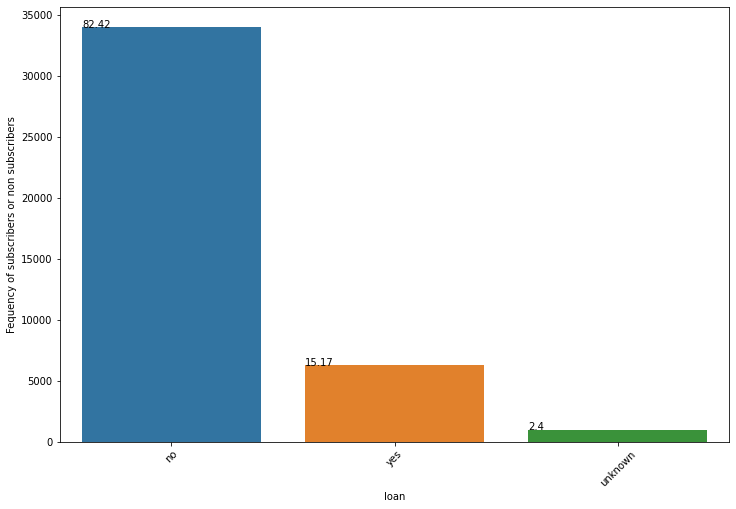

In [32]:
bar_graph('loan')

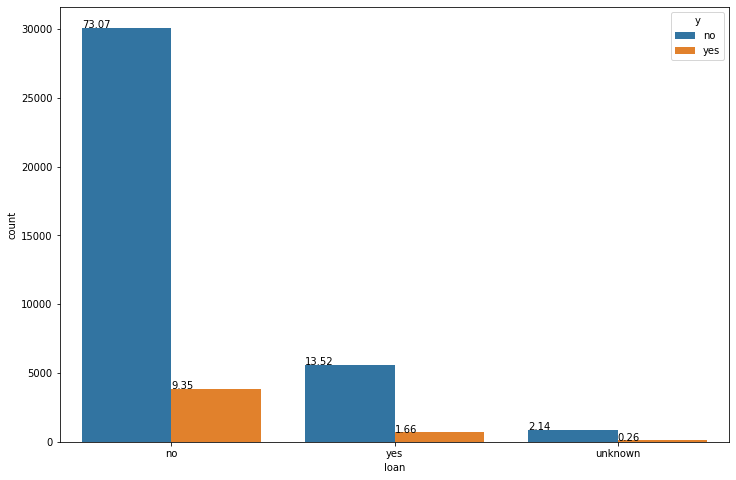

In [33]:
compare_bar_graph('loan')

####Contact

In [34]:
bank_data["contact"].value_counts()

cellular     26135
telephone    15041
Name: contact, dtype: int64

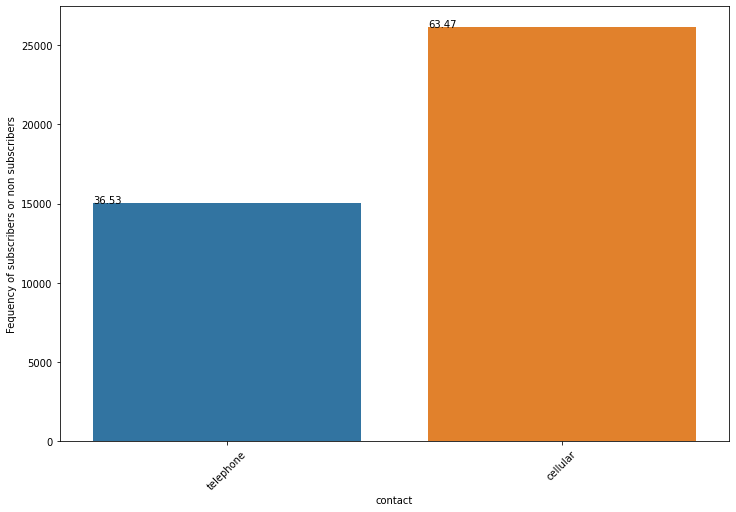

In [35]:
bar_graph('contact')

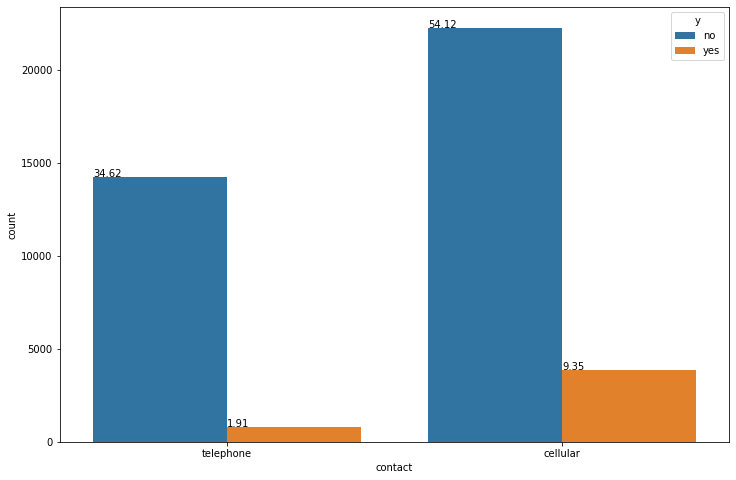

In [36]:
compare_bar_graph('contact')

####Month

In [37]:
bank_data["month"].value_counts()

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

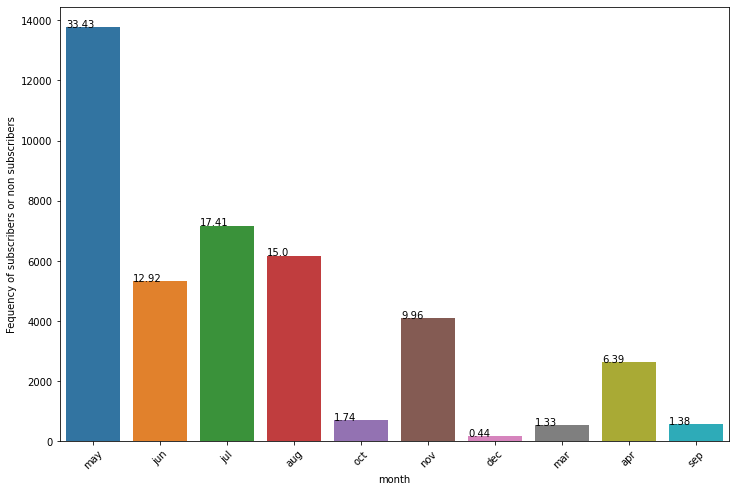

In [38]:
bar_graph('month')

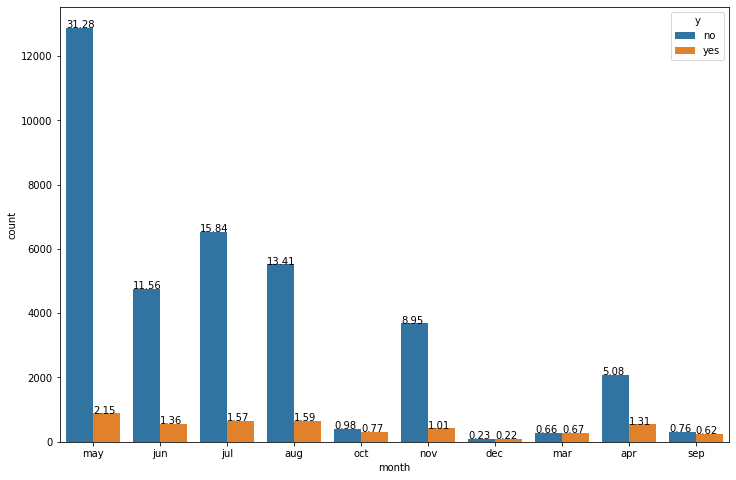

In [39]:
compare_bar_graph('month')

####Day of Week

In [40]:
bank_data["day_of_week"].value_counts()

thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64

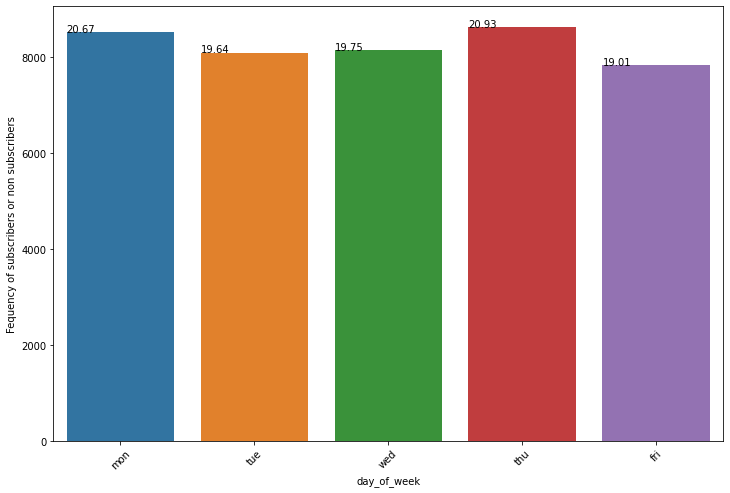

In [41]:
bar_graph('day_of_week')

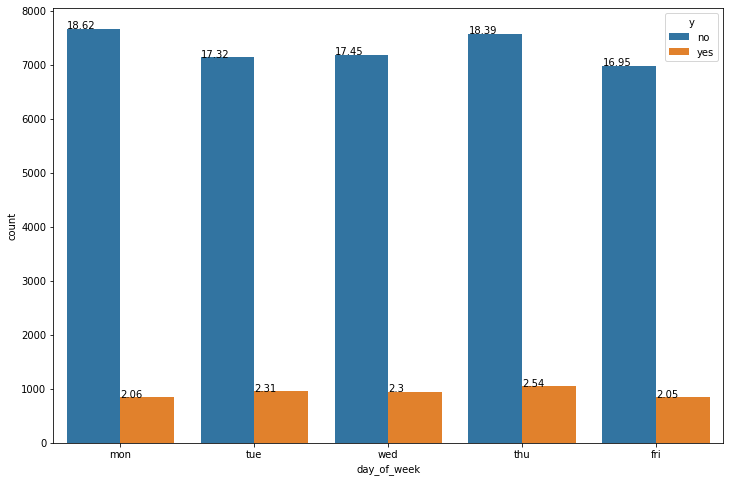

In [42]:
compare_bar_graph('day_of_week')

####Poutcome

In [43]:
bank_data["poutcome"].value_counts()

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64

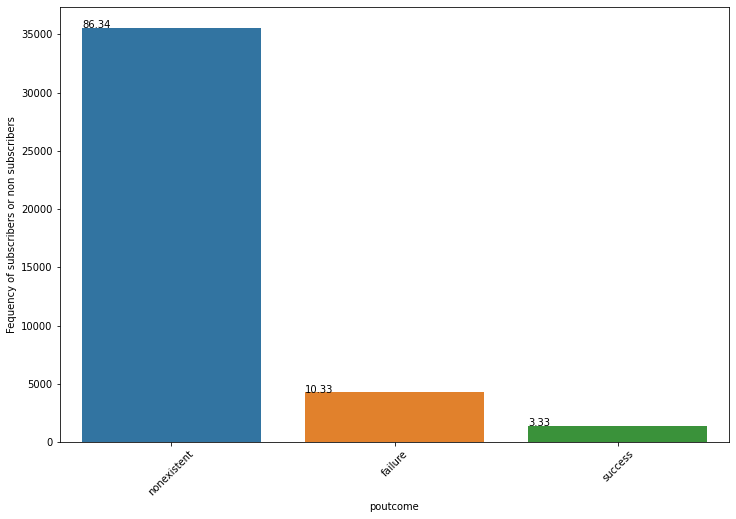

In [44]:
bar_graph('poutcome')

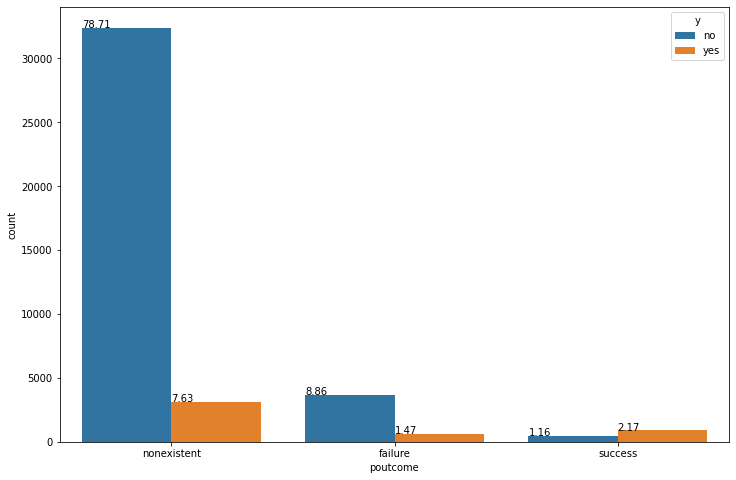

In [45]:
compare_bar_graph('poutcome')

####Age

In [46]:
bank_data["age"].value_counts()

31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64

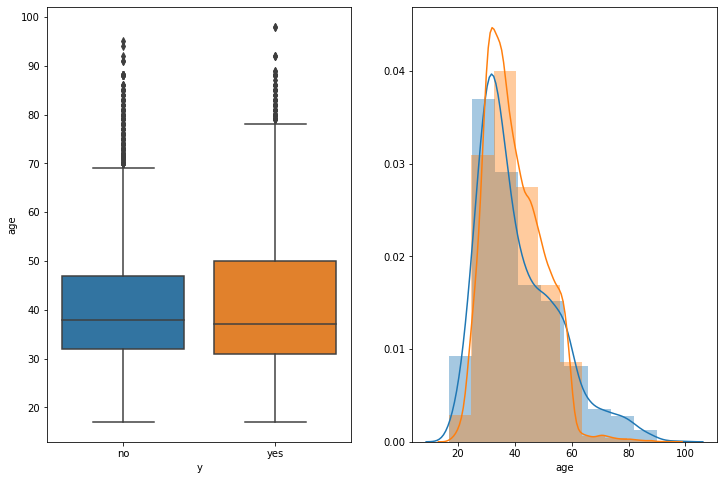

In [47]:
continous_graph('age')

####Duration

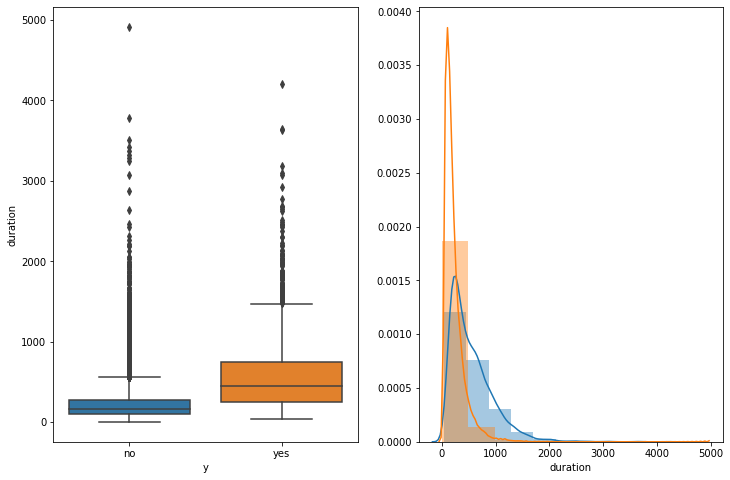

In [48]:
continous_graph('duration')

####Campaign

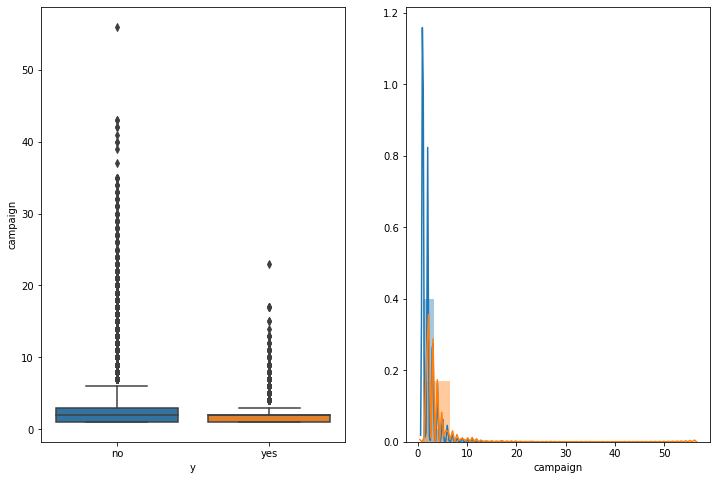

In [49]:
continous_graph('campaign')

####Pdays

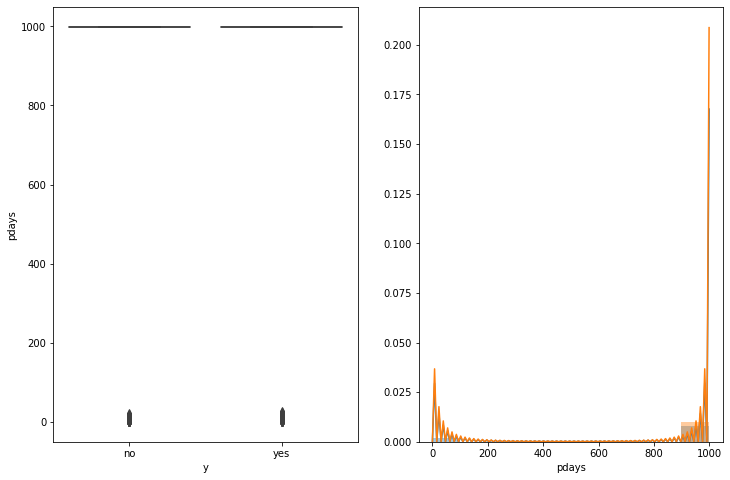

In [50]:
continous_graph('pdays')

####Previous

In [51]:
bank_data['previous'].value_counts()

0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

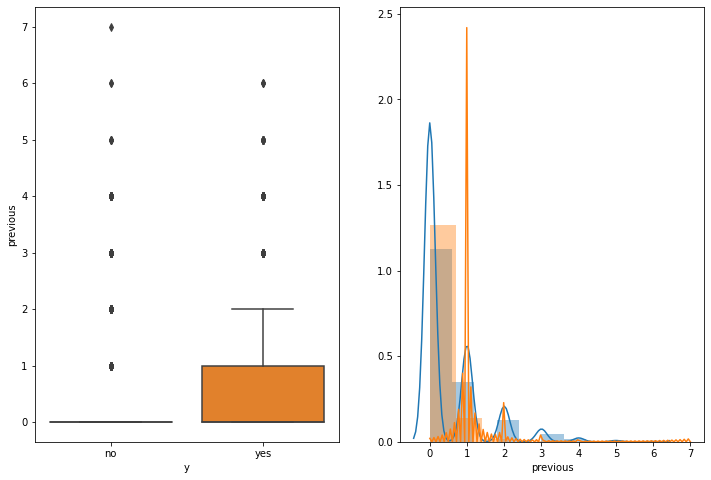

In [52]:
continous_graph('previous')

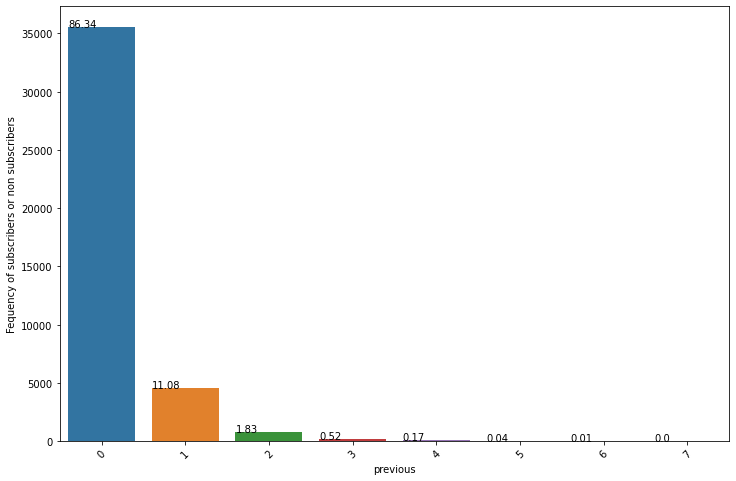

In [53]:
bar_graph('previous')

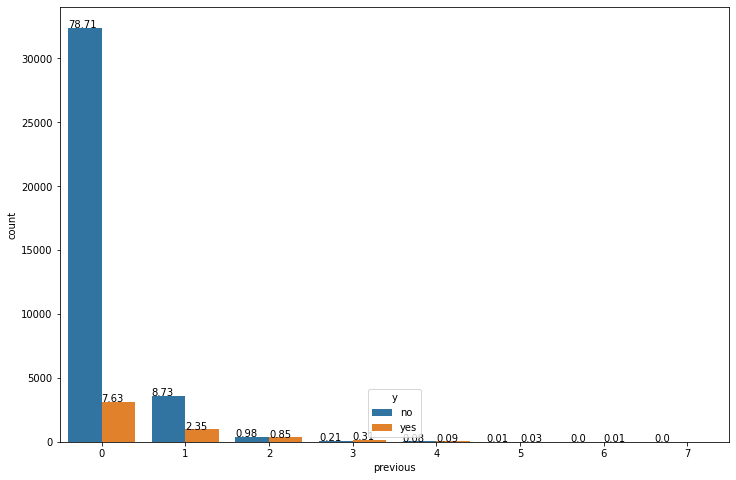

In [54]:
compare_bar_graph('previous')

####emp.var.rate

In [55]:
bank_data["emp.var.rate"].value_counts()

 1.4    16228
-1.8     9182
 1.1     7762
-0.1     3682
-2.9     1662
-3.4     1070
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

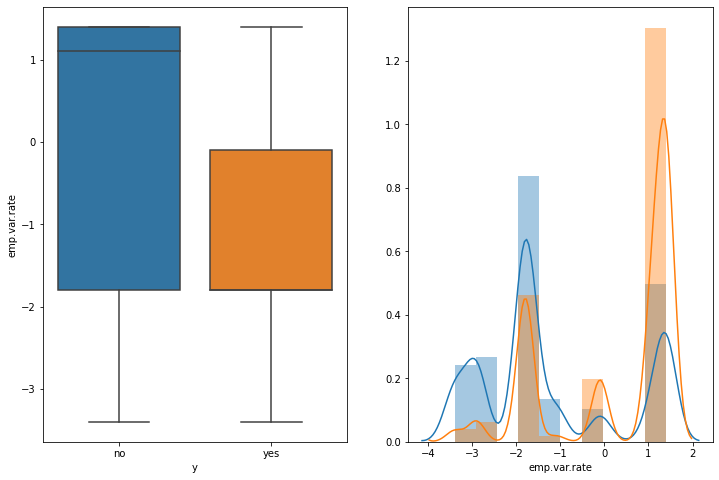

In [56]:
continous_graph('emp.var.rate')

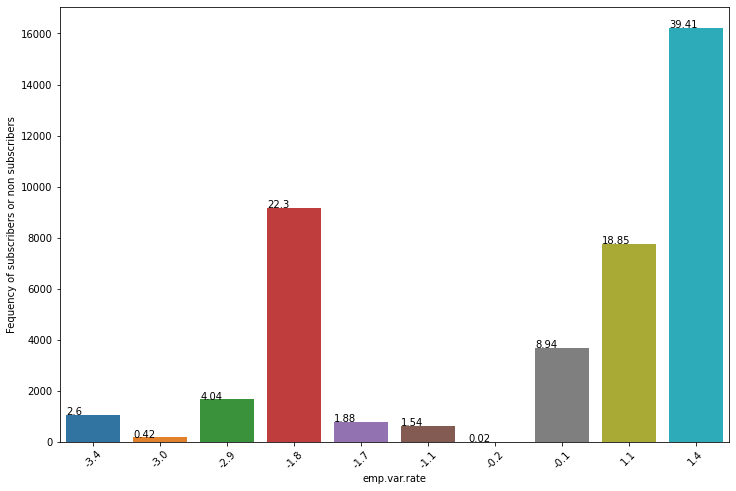

In [57]:
bar_graph('emp.var.rate')

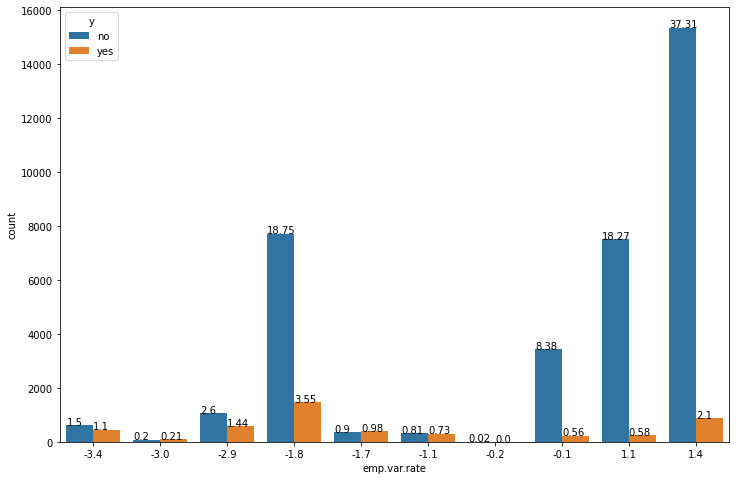

In [58]:
compare_bar_graph('emp.var.rate')

####cons.price.idx

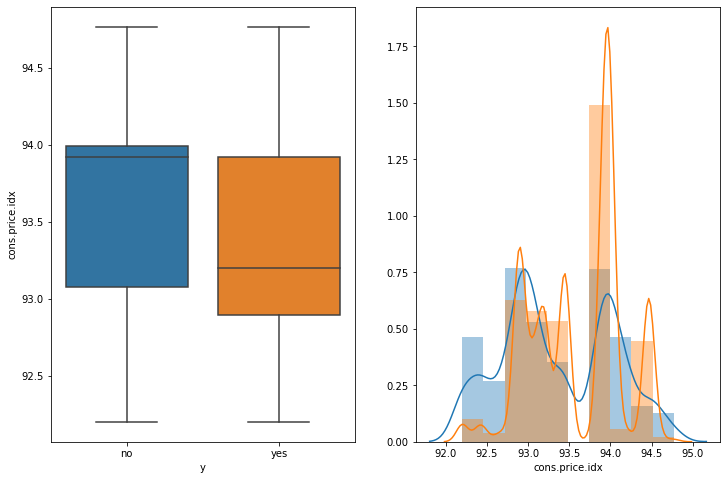

In [59]:
continous_graph('cons.price.idx')

####cons.conf.idx

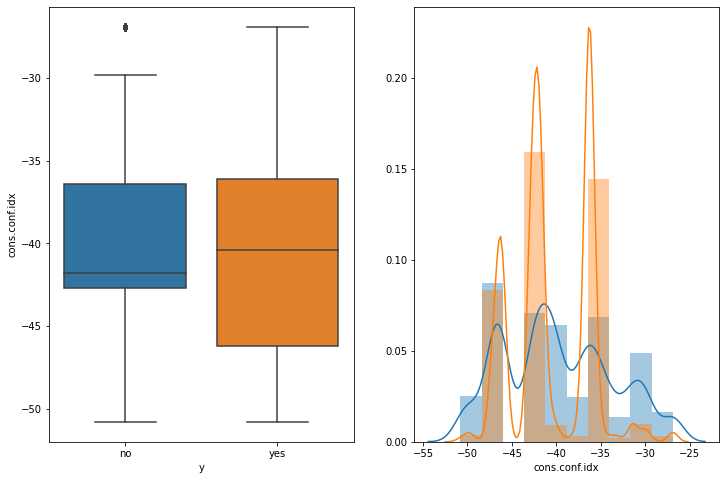

In [60]:
continous_graph('cons.conf.idx')

####euribor3m

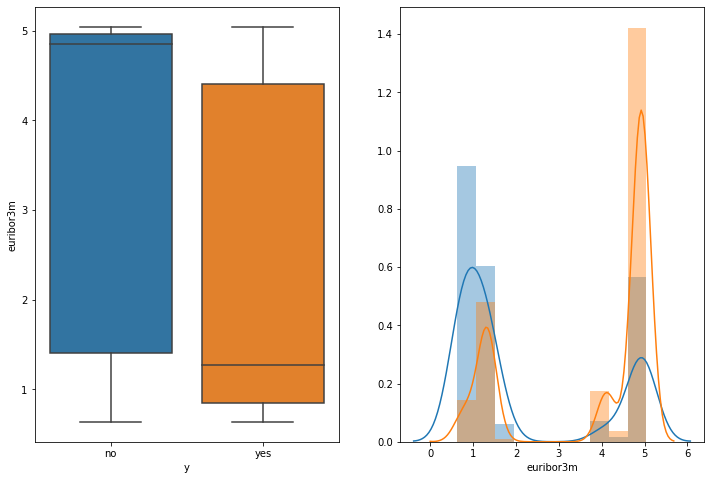

In [61]:
continous_graph('euribor3m')

####nr.employed

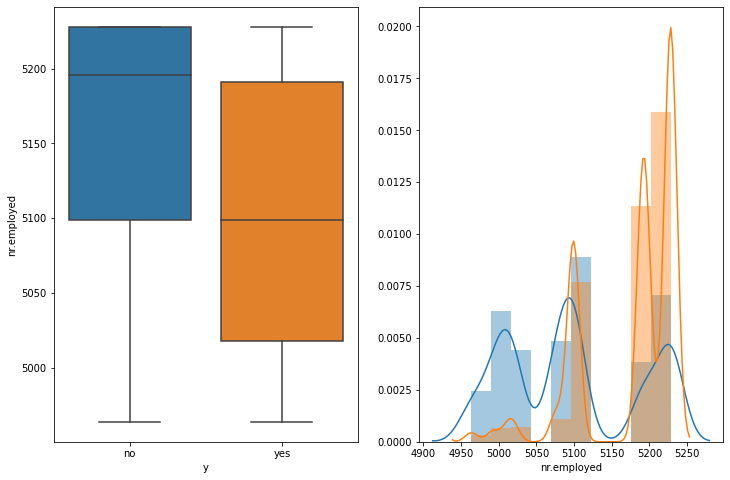

In [62]:
continous_graph('nr.employed')

###Correlations

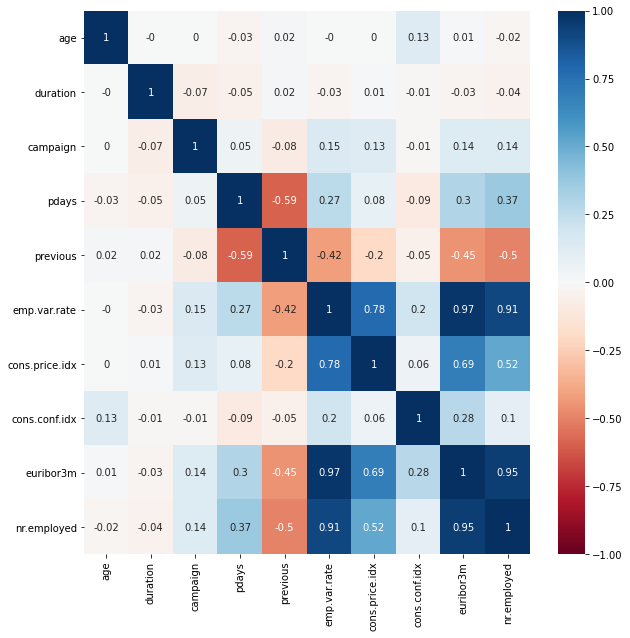

In [63]:
plt.figure(figsize=(10,10))
sb.heatmap(bank_data.corr().round(2),
            cmap='RdBu', vmin=-1.0,
            annot=True)

##PreProcesssing

In [64]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [0]:
bank_data_dummies=pd.get_dummies(bank_data,columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])

In [66]:
bank_data_dummies.shape

(41176, 64)

In [67]:
bank_data_dummies.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'mon

In [0]:
bank_data_dummies=bank_data_dummies.drop('y', axis=1)
x=bank_data_dummies
y=bank_data['y']

In [69]:
x.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

In [70]:
y.replace({"no":0, "yes":1}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
x_rest, x_test, y_rest, y_test = train_test_split(x, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_rest, y_rest, test_size=0.2)

In [72]:
print("x train: ",x_train.shape)
print("y train: ",y_train.shape)
print("x test: ",x_test.shape)
print("y test: ",y_test.shape)
print("x val: ",x_val.shape)
print("y val: ",y_val.shape)

x train:  (26352, 63)
y train:  (26352,)
x test:  (8236, 63)
y test:  (8236,)
x val:  (6588, 63)
y val:  (6588,)


In [74]:
y_val

26871    0
38230    1
17146    0
3941     0
17731    0
        ..
27683    0
4025     0
40315    1
1541     0
4223     0
Name: y, Length: 6588, dtype: int64

##Model

###Logistic

###KNN

###Tree